In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
#load dataset
dataset = pd.read_csv('winequality-red.csv')

#melihat tipe dan nilai null
dataset.info()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
dataset.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

Dari intrepetasi data di atas, dapat dilihat bahwa tidak ada data yang mengandung nilai null

OUTLIER CHECKER

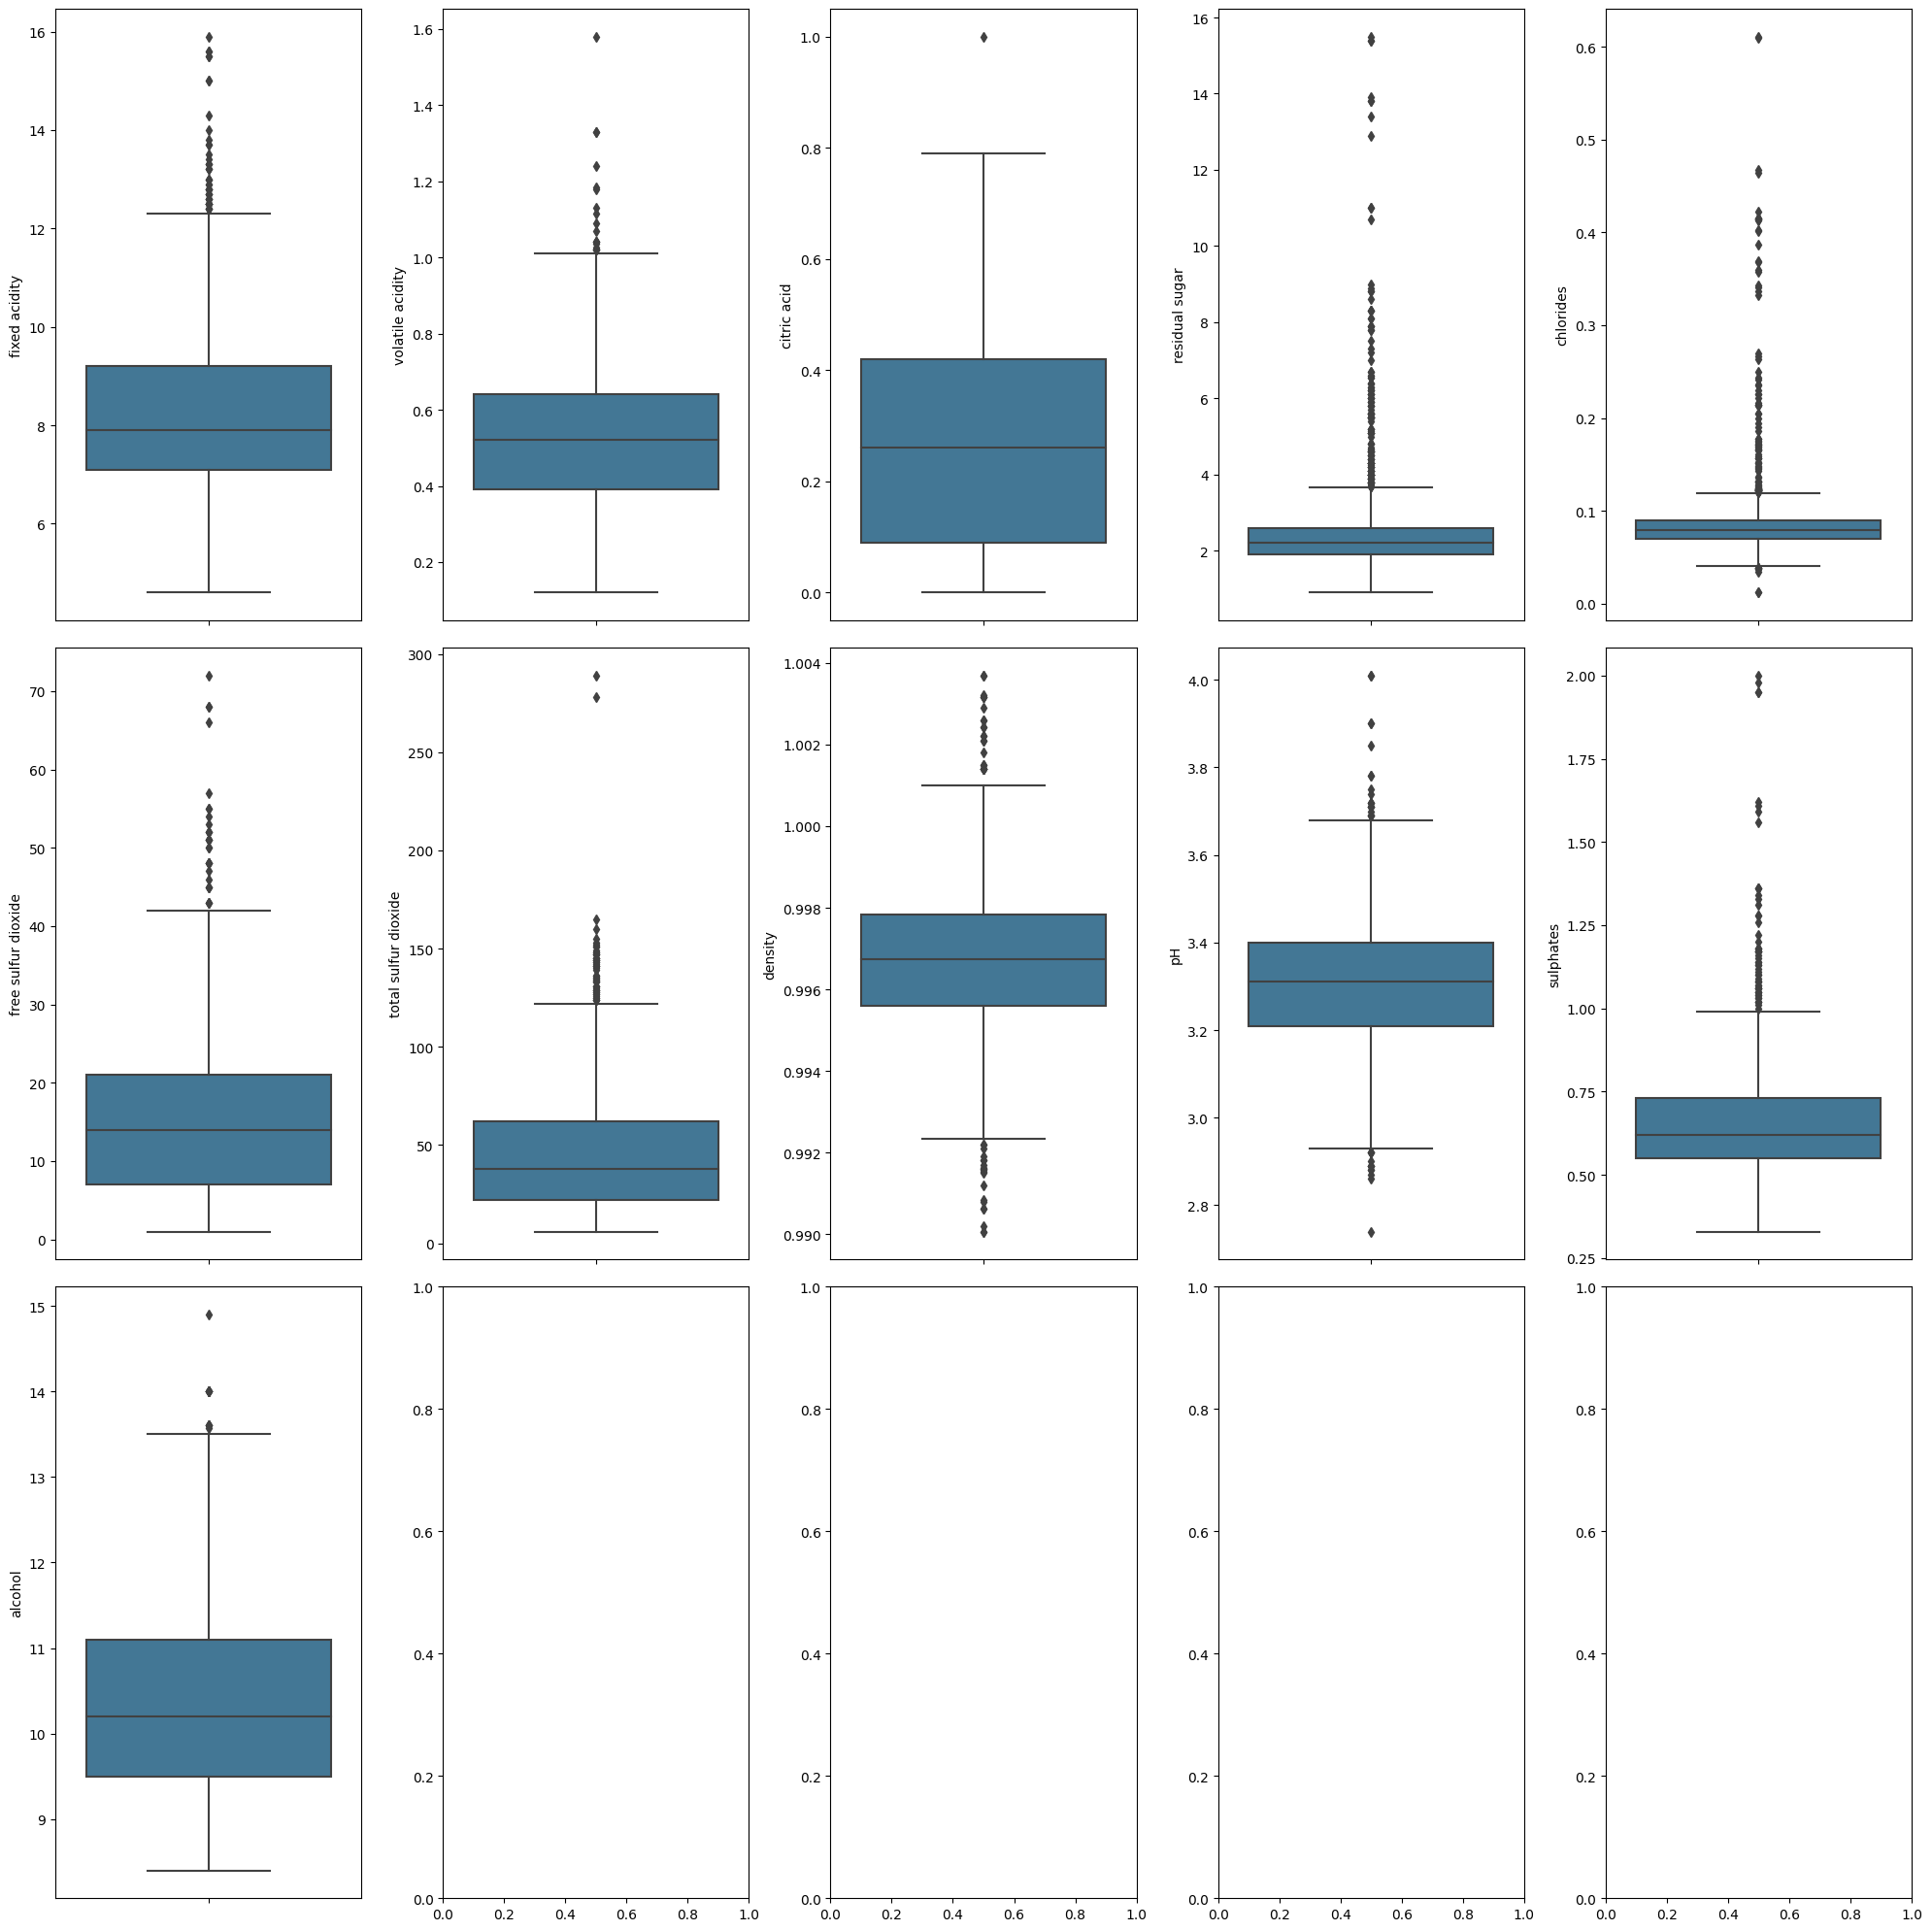

In [6]:
fig, axs = plt.subplots(ncols=5, nrows=3, figsize=(20,20))

index = 0
axs = axs.flatten()

for k,v in dataset.drop(['quality'], axis=1).items():
    sns.boxplot(y=k, data=dataset.drop(['quality'], axis=1), ax = axs[index], palette='mako')
    index += 1

plt.tight_layout()
plt.show()

Dari visualisasi data di atas, dapat dilihat bahwa banyak data yang mengandung nilai outlier, maka dari itu kita perlu melakukan handling outlier
Dalam hal ini saya mencoba dua langkah, yaitu dengan remove outlier dan mengganti nilai outlier dengan nilai modus
Dari langkah yang saya ambil, ternyata remover outlier lebih menghasilkan nilai prediksi yang lebih tinggi

In [7]:
#mengganti outliers dengan modus
#cuma mendapatkan prediksi sebesar 0.78

'''def change_outliers (data, feature_names):
    import numpy as np
    import statistics

    q1 = np.percentile(data[feature_names], 25, method='midpoint')
    q3 = np.percentile(data[feature_names], 75, method='midpoint')
    iqr = q3 - q1

    upper = q3 + 1.5 * iqr
    lower = q1 - 1.5 * iqr

    print(upper)
    print(lower)

    
    feature_mode = statistics.mode(data[feature_names])

    new_data_value = []

    for i in data[feature_names].values:
        if (i < lower or i > upper):
            new_data_value.append(feature_mode)
        else:
            new_data_value.append(i)

    new_column_name = f'new_{feature_names}'

    data[new_column_name] = pd.DataFrame(new_data_value)



    return data[new_column_name]'''
            




    

"def change_outliers (data, feature_names):\n    import numpy as np\n    import statistics\n\n    q1 = np.percentile(data[feature_names], 25, method='midpoint')\n    q3 = np.percentile(data[feature_names], 75, method='midpoint')\n    iqr = q3 - q1\n\n    upper = q3 + 1.5 * iqr\n    lower = q1 - 1.5 * iqr\n\n    print(upper)\n    print(lower)\n\n    \n    feature_mode = statistics.mode(data[feature_names])\n\n    new_data_value = []\n\n    for i in data[feature_names].values:\n        if (i < lower or i > upper):\n            new_data_value.append(feature_mode)\n        else:\n            new_data_value.append(i)\n\n    new_column_name = f'new_{feature_names}'\n\n    data[new_column_name] = pd.DataFrame(new_data_value)\n\n\n\n    return data[new_column_name]"

In [8]:
def remove_outliers(features):
    import numpy as np

    q1 = np.percentile(features, 25, method='midpoint')
    q3 = np.percentile(features, 75, method='midpoint')
    iqr = q3 - q1

    upper = np.where(features >= (q3 + 1.5*iqr))
    lower = np.where(features<= (q1 - 1.5*iqr))

    index = []

    index.extend(upper[0])
    index.extend(lower[0])


    return index


In [9]:
remove_outliers(dataset.quality)

[267,
 278,
 390,
 440,
 455,
 481,
 495,
 498,
 588,
 828,
 1061,
 1090,
 1120,
 1202,
 1269,
 1403,
 1449,
 1549,
 459,
 517,
 690,
 832,
 899,
 1299,
 1374,
 1469,
 1478,
 1505]

In [10]:
index_list = []

for i in dataset.columns:
    index_list.extend(remove_outliers(dataset[i]))


list = pd.Series(index_list)

#drop duplicate index dalam list
list.drop_duplicates()

#drop data outlier
dataset.drop(list, inplace=True)


In [11]:
#new dataset shape
dataset.shape

(1176, 12)

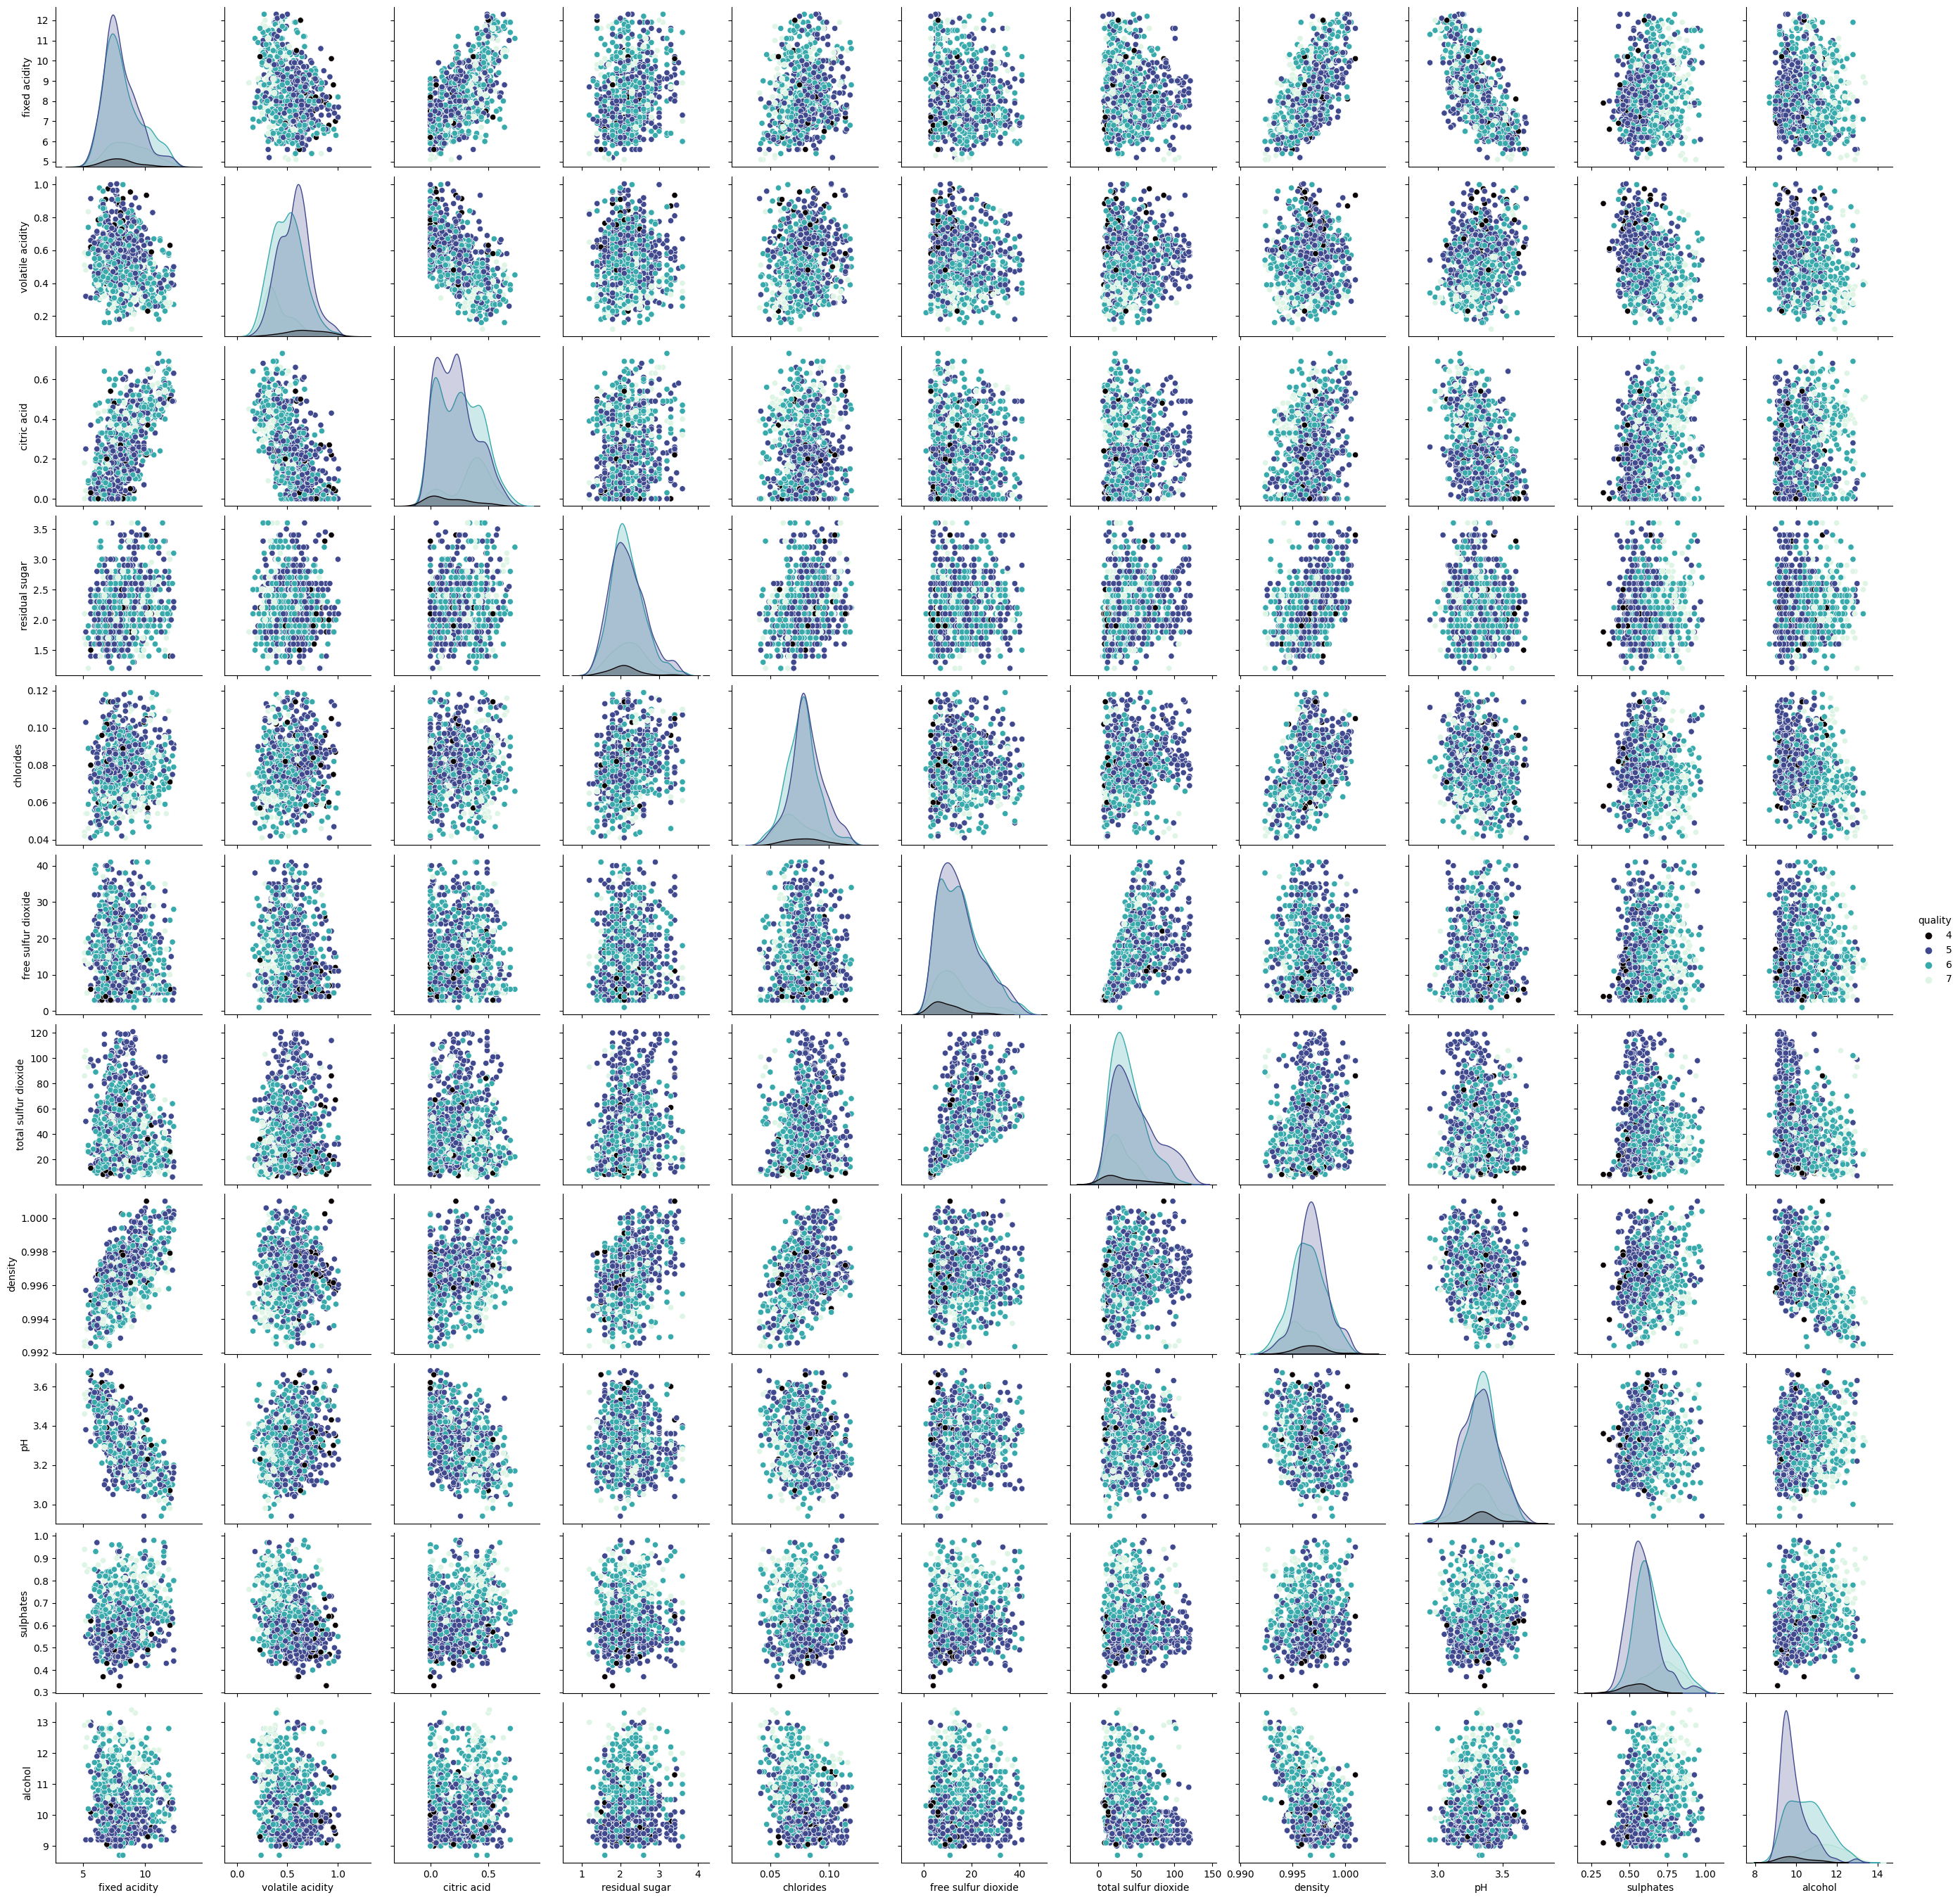

In [12]:
sns.pairplot(data=dataset, hue='quality', palette='mako')

plt.show()

VISUALISASI DATA KEMBALI

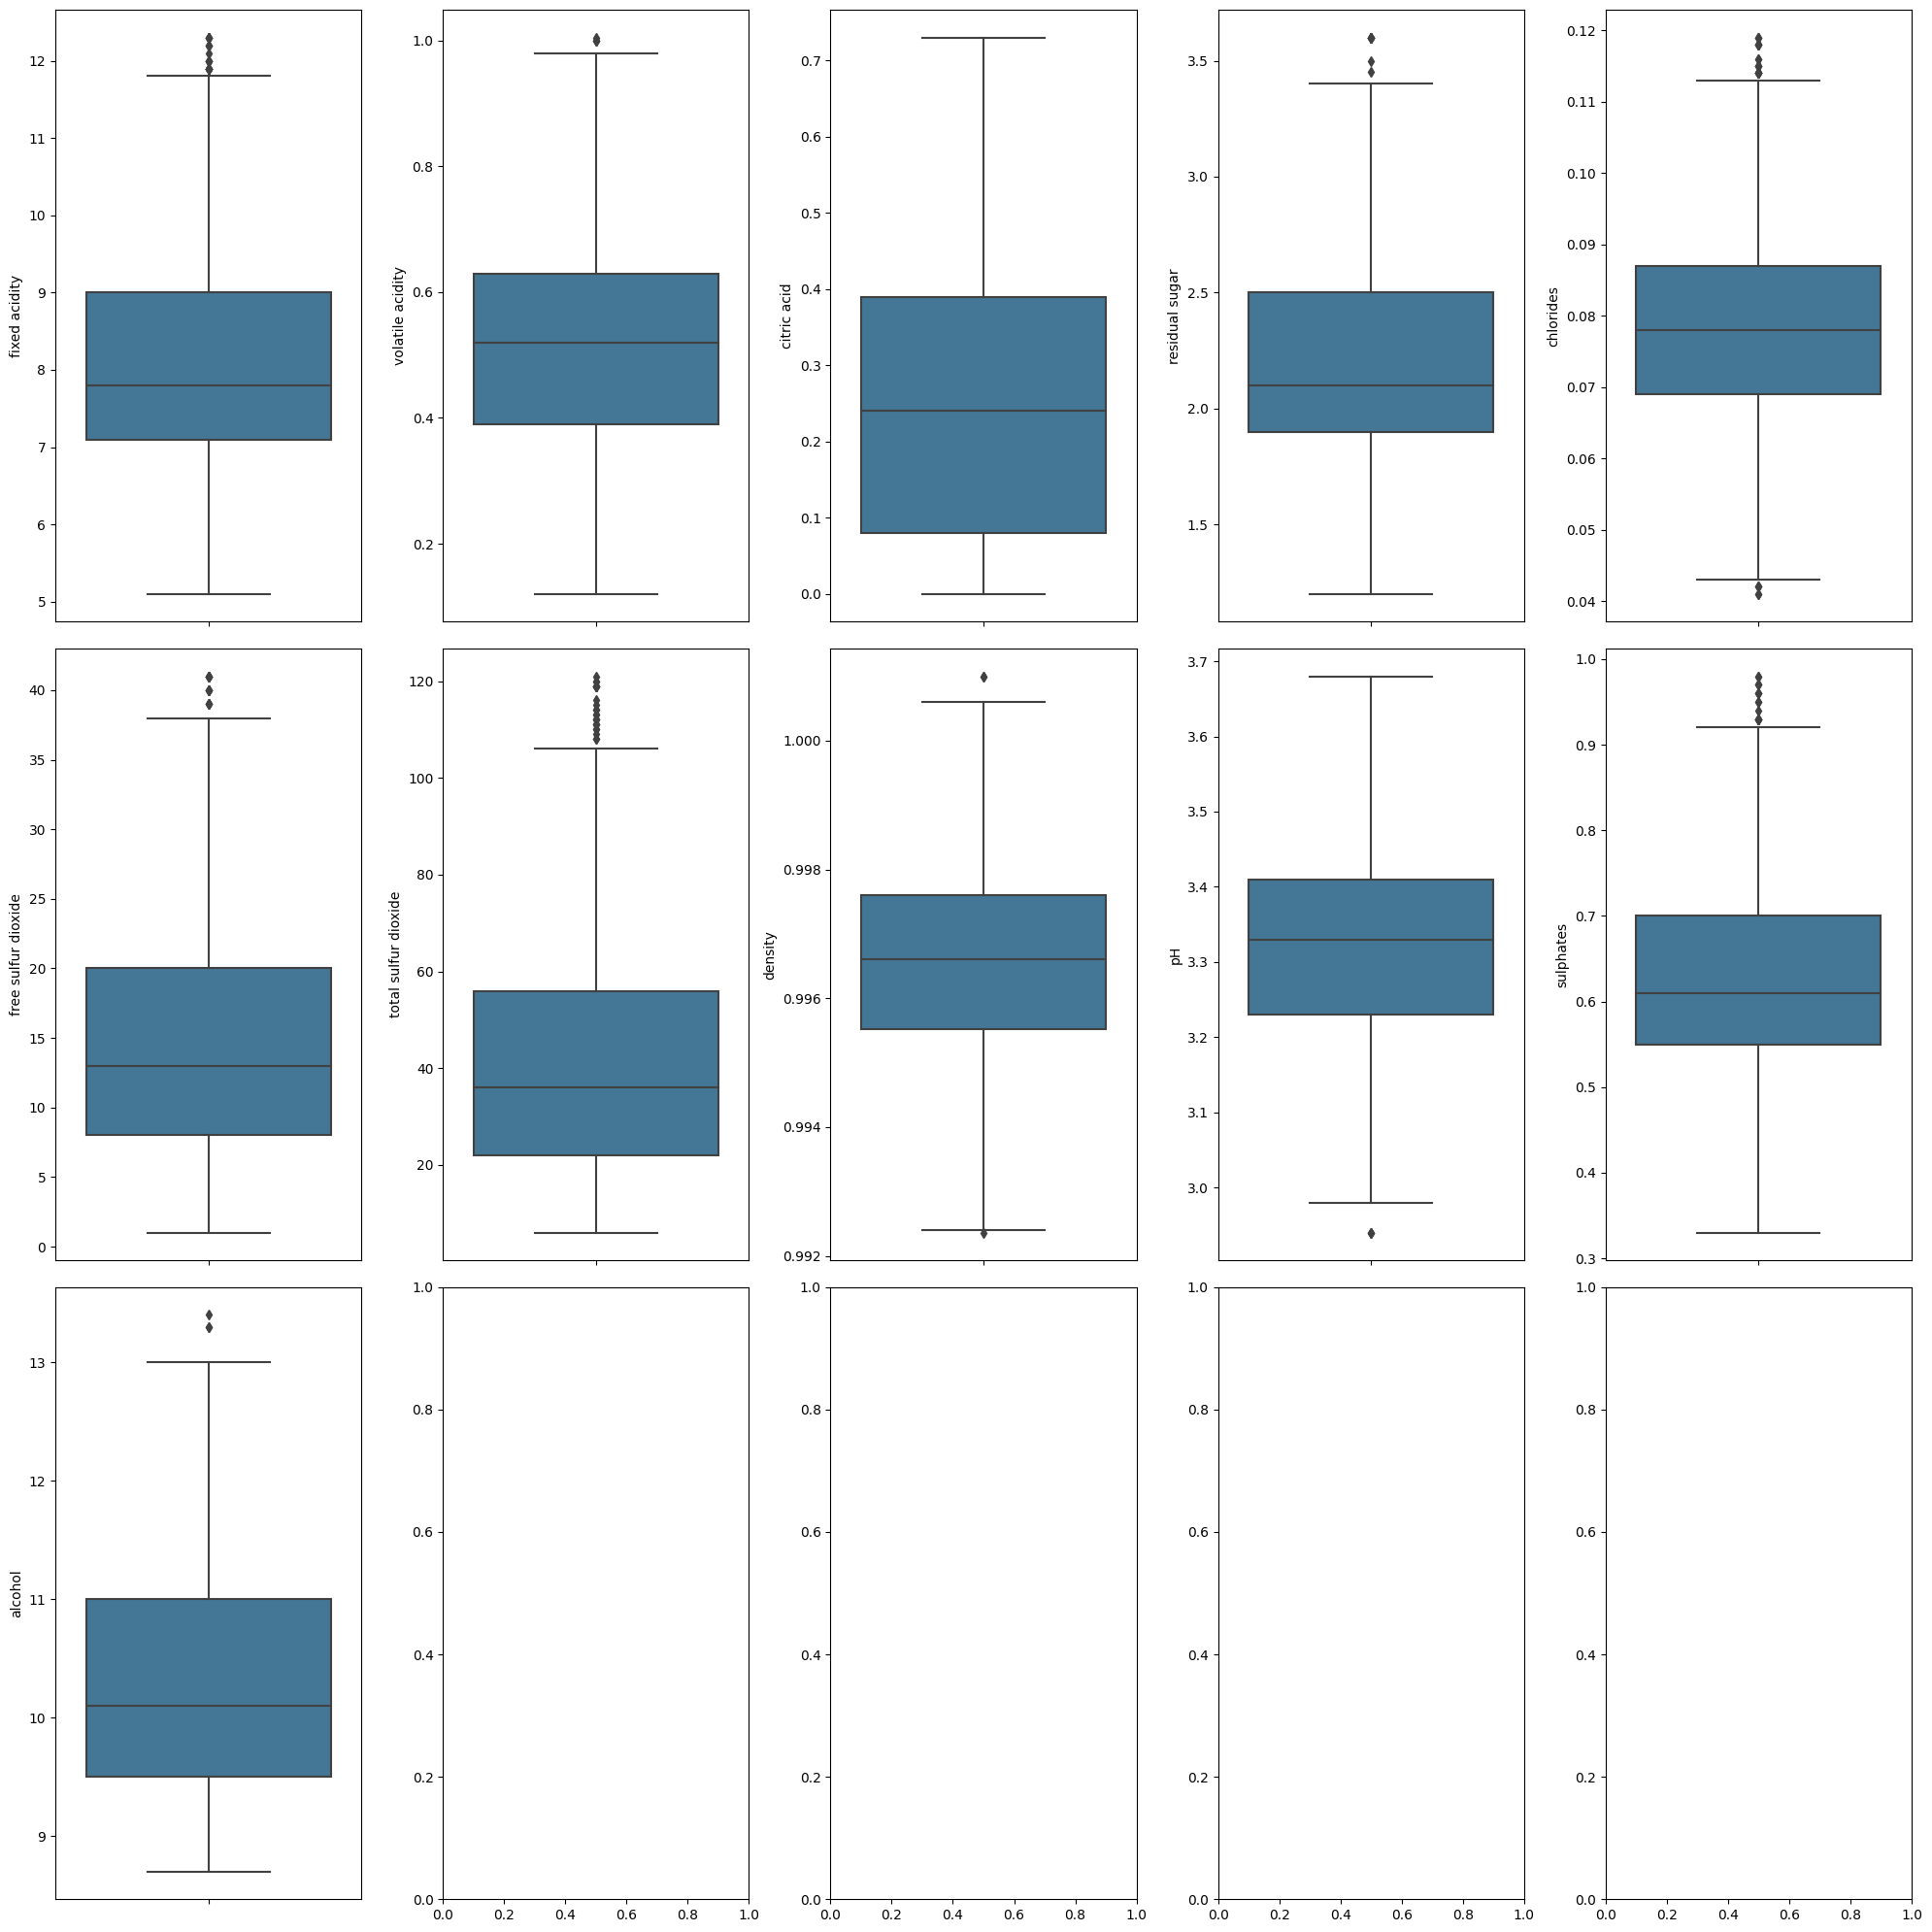

In [13]:

fig, axs = plt.subplots(ncols=5, nrows=3, figsize=(20,20))

index = 0
axs = axs.flatten()

for k,v in dataset.drop(['quality'], axis=1).items():
    sns.boxplot(y=k, data=dataset.drop(['quality'], axis=1), ax = axs[index], palette='mako')
    index += 1

plt.tight_layout()
plt.show()

NILAI OUTLIER TELAH BERKURANG

C:\Users\mufad\AppData\Local\Temp\ipykernel_26656\129063532.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


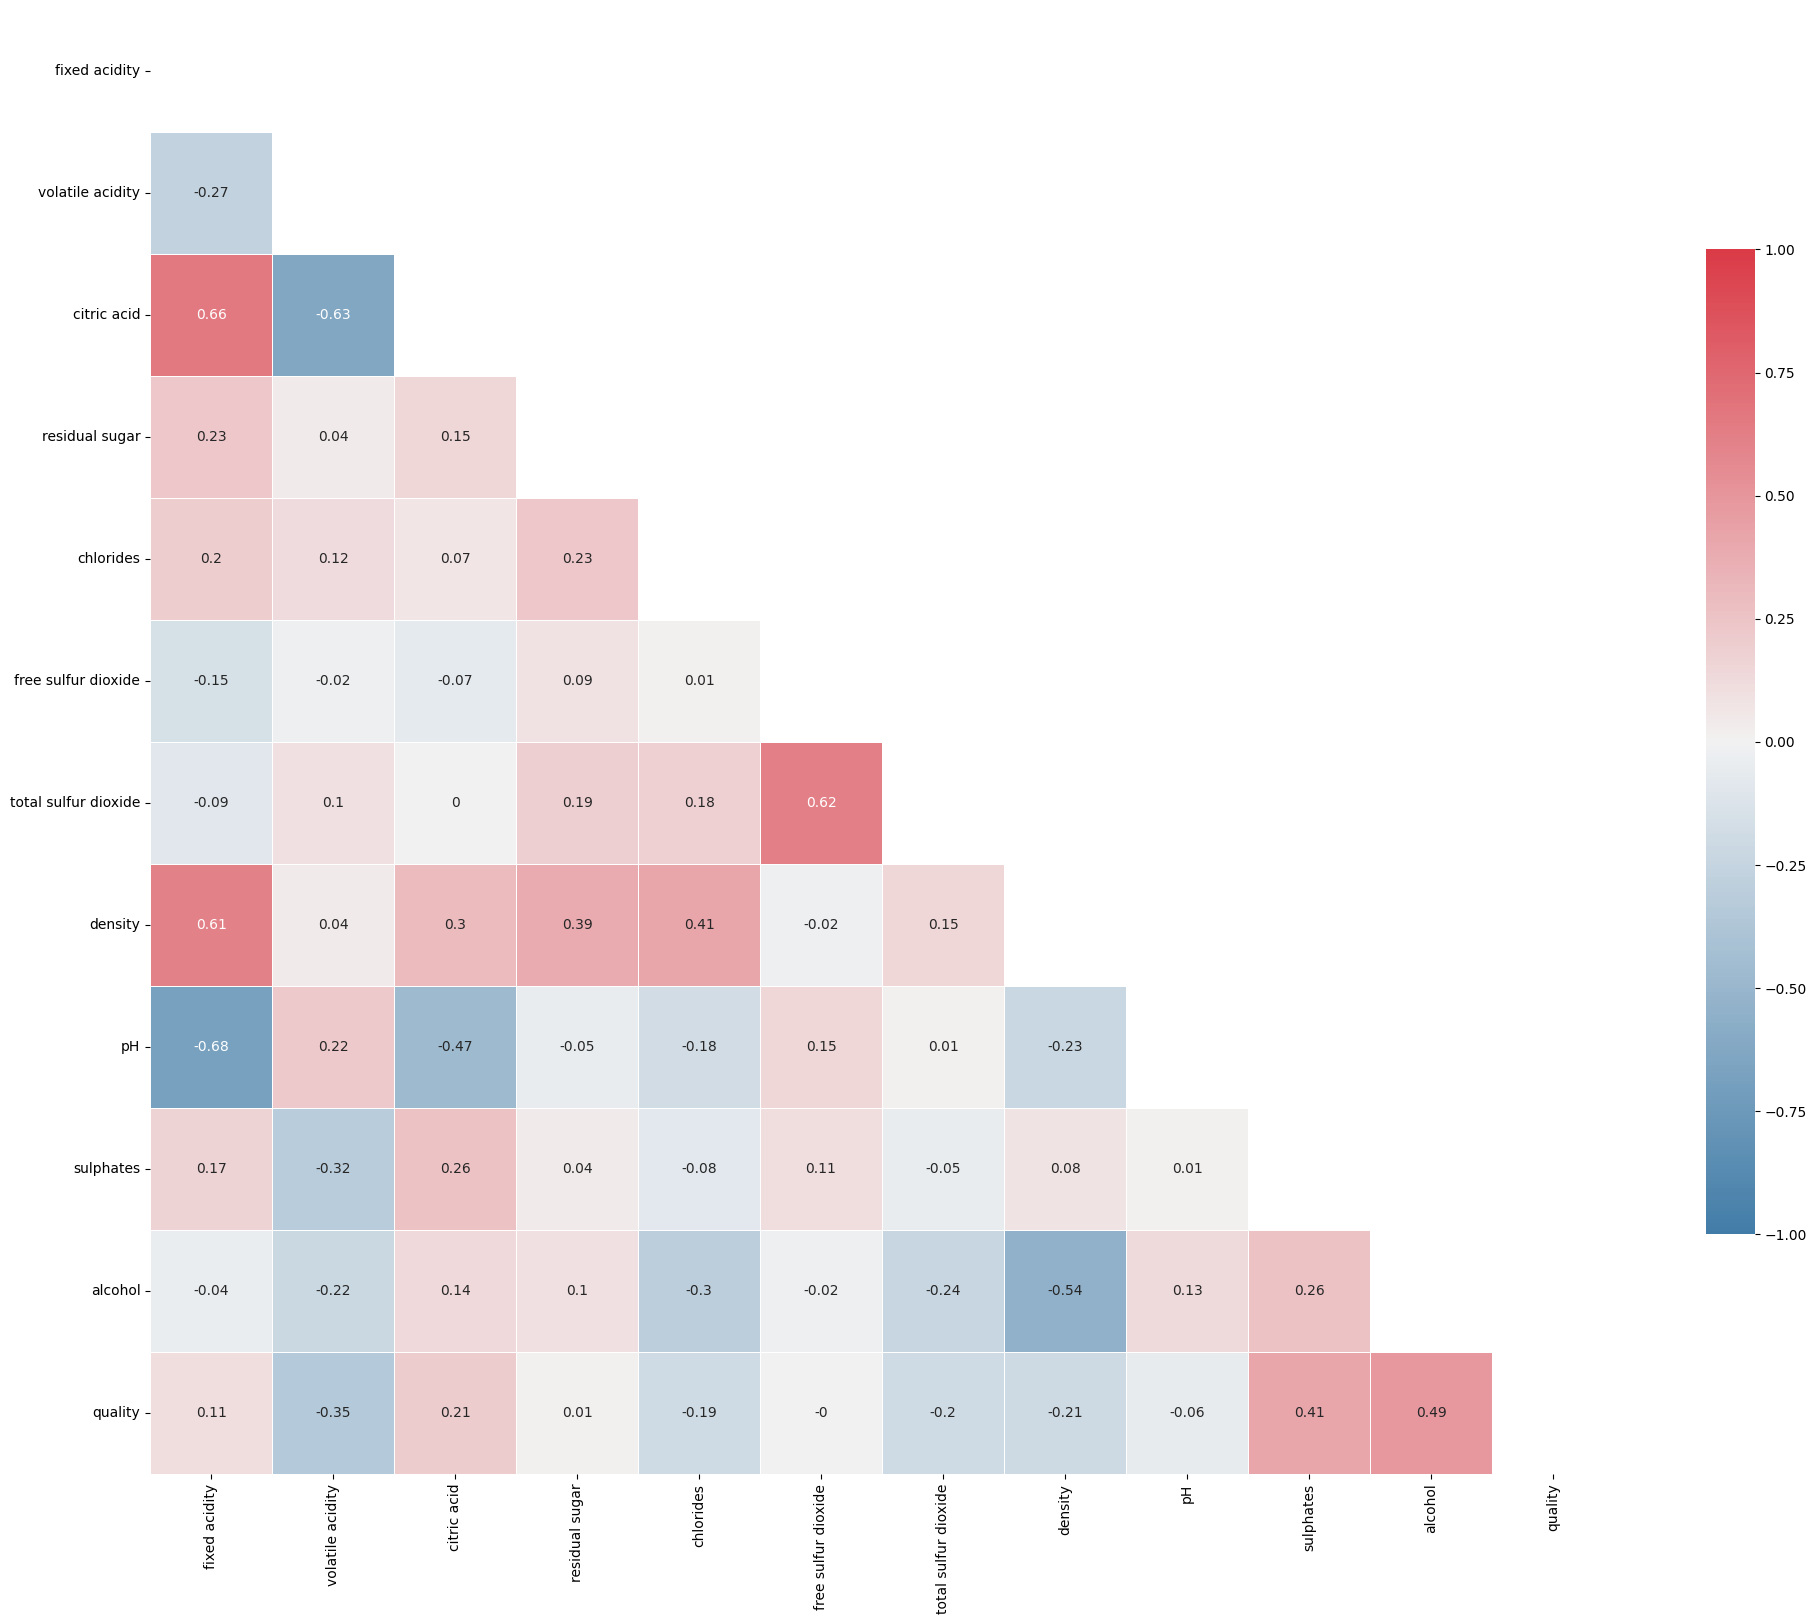

In [14]:
corr = dataset.corr().round(2)

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(20,20))

cmap = sns.diverging_palette(240, 10, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap = cmap, vmin = -1, vmax=1, center=0,
square=True, linewidths=.5, cbar_kws={'shrink':.5}, annot=True)

plt.tight_layout()

plt.show()


Dari heatmap diatas sebenarnya terdapat multikolinearitas dimana antar-feature memiliki korelasi yang tinggi satu sama lain, dapat dilihat berdasarkan warna yang semakin menjadi merah muda

In [15]:
# define features and target
x = dataset.drop(['quality','free sulfur dioxide','density'], axis=1)
y = dataset.quality


In [16]:
#Split data to train and test data

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=1)





In [17]:
#SMOTE method for handling imbalanced data

from imblearn.over_sampling import SMOTE
os = SMOTE(sampling_strategy='minority',random_state=1)
x_train,y_train = os.fit_resample(x_train,y_train)


In [18]:
#Preprocessing step

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

sc.fit_transform(x_train)
sc.fit_transform(x_test)




array([[-0.50555838,  0.3402548 , -1.32380834, ...,  1.00860268,
        -0.35959961,  0.95068729],
       [ 0.57256009, -0.17407751, -0.1235167 , ...,  0.08181397,
         1.77699426,  0.75296779],
       [-0.43368382, -0.10978598, -1.20949485, ...,  0.31351115,
        -0.70145463,  0.1598093 ],
       ...,
       [-0.50555838, -0.23836905,  0.21942378, ...,  0.23627876,
         0.06771916,  1.64270554],
       [-1.79930055,  0.56527518, -1.32380834, ...,  2.01262378,
        -0.87238214, -0.4333492 ],
       [-0.57743295, -1.42776252,  0.90530472, ..., -0.22711559,
        -0.87238214,  1.14840679]])

In [19]:
#Import model library
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rfc = RandomForestClassifier(random_state=5)

#training data into model
rfc.fit(x_train,y_train)

#predict the value beside the model
predict = rfc.predict(x_test)

y_train_pred = rfc.predict(x_train)

#print the accuration score
print(accuracy_score(y_test, predict))







0.7372881355932204


In [20]:

#getting know about the model f1 score
from sklearn.metrics import classification_report
print('CLASSIFICATION REPORT TRAIN DATA')
print(60*'=')
print(classification_report(y_train, y_train_pred))
print('\n\n\nCLASSIFICATION REPORT TEST DATA')
print(60*'=')
print(classification_report(y_test, predict))


CLASSIFICATION REPORT TRAIN DATA
              precision    recall  f1-score   support

           4       1.00      1.00      1.00       404
           5       1.00      1.00      1.00       404
           6       1.00      1.00      1.00       400
           7       1.00      1.00      1.00       110

    accuracy                           1.00      1318
   macro avg       1.00      1.00      1.00      1318
weighted avg       1.00      1.00      1.00      1318




CLASSIFICATION REPORT TEST DATA
              precision    recall  f1-score   support

           4       0.00      0.00      0.00         7
           5       0.79      0.80      0.80       107
           6       0.74      0.77      0.76        97
           7       0.72      0.52      0.60        25

    accuracy                           0.74       236
   macro avg       0.56      0.52      0.54       236
weighted avg       0.74      0.74      0.74       236



Dari report di atas, didapat model dengan akurasi 0.74 ketika menggunakan random forest method